In [5]:
import cv2
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
import glob
import os
plt.rcParams['font.family'] = 'Meiryo'

In [6]:
target = r'./Dataset/'
os.path.exists(target)

True

In [9]:
g = glob.glob(target + '*.csv')
g[:3]

['./Dataset\\CWC2018-19_Leg1_ResultsBook.csv',
 './Dataset\\CWC2018-19_Leg2_ResultsBook.csv',
 './Dataset\\CWC2018-19_Leg3_ResultsBook.csv']

In [10]:
fn  = g[10]

In [99]:
def func (fn ):
    index = 0
    df = pd.read_csv(fn,index_col = 0 )
    dir = os.path.basename(fn).split('.')[0]
    df = df.loc[ df['INFO'] == 'OK' ]
    if len(df) == 0 :return '' , None
    fullpath_list = df['filepath'].map(lambda fn : os.path.join(target,dir,fn ) )
    print( dir , fullpath_list.map(os.path.exists).all() , fullpath_list.map(os.path.exists).unique() )
    qfn = fullpath_list.values[index]
    img = cv2.imread(qfn)
    display(img.shape)

    qfn2 = fullpath_list.values[index+1]
    postimage = cv2.imread(qfn2)

    return dir , img,postimage
    
    

In [100]:
ql = list(map(func,g))

CWC2018-19_Leg1_ResultsBook True [ True]


(600, 300, 3)

CWC2018-19_Leg2_ResultsBook True [ True]


(601, 301, 3)

CWC2018-19_Leg3_ResultsBook True [ True]


(600, 300, 3)

ECC2017_ResultsBook_Men_A-Division True [ True]


(600, 300, 3)

ECC2017_ResultsBook_Women_A-Division True [ True]


(600, 300, 3)

ECC2018_ResultsBook_Men_A-Division True [ True]


(600, 300, 3)

ECC2018_ResultsBook_Women_A-Division True [ True]


(600, 300, 3)

ECC2019_ResultsBook_Men_A-Division True [ True]


(600, 300, 3)

ECC2019_ResultsBook_Women_A-Division True [ True]


(600, 300, 3)

ECC2021_ResultsBook_Men_A-Division True [ True]


(601, 301, 3)

ECC2021_ResultsBook_Women_A-Division True [ True]


(601, 301, 3)

ECC2022_ResultsBook_Men_A-Division True [ True]


(601, 301, 3)

ECC2022_ResultsBook_Women_A-Division True [ True]


(601, 301, 3)

ECC2023_ResultsBook_Men_A-Division True [ True]


(600, 300, 3)

ECC2023_ResultsBook_Women_A-Division True [ True]


(600, 300, 3)

OQE2021_ResultsBook_Men True [ True]


(601, 301, 3)

OWG2018_ResultsBook True [ True]


(600, 300, 3)

OWG2022_ResultsBook True [ True]


(600, 300, 3)

PACC2017_ResultsBook_Men True [ True]


(600, 300, 3)

PACC2017_ResultsBook_Women True [ True]


(600, 300, 3)

PACC2018_ResultsBook_Men True [ True]


(600, 300, 3)

PACC2018_ResultsBook_Women True [ True]


(600, 300, 3)

PACC2019_ResultsBook_Men True [ True]


(600, 300, 3)

PACC2019_ResultsBook_Women True [ True]


(600, 300, 3)

PCCC2022_ResultsBook_Men_A-Division True [ True]


(601, 301, 3)

PCCC2022_ResultsBook_Women_A-Division True [ True]


(601, 301, 3)

PCCC2023_ResultsBook_Men_A-Division True [ True]


(600, 300, 3)

PCCC2023_ResultsBook_Women_A-Division True [ True]


(601, 301, 3)

WMCC2018_ResultsBook True [ True]


(601, 301, 3)

WMCC2019_ResultsBook True [ True]


(601, 301, 3)

WMCC2021_ResultsBook True [ True]


(601, 301, 3)

WMCC2022_ResultsBook True [ True]


(600, 300, 3)

WMCC2023_ResultsBook True [ True]


(601, 301, 3)

WWCC2018_ResultsBook True [ True]


(601, 301, 3)

WWCC2019_ResultsBook True [ True]


(600, 300, 3)

WWCC2022_ResultsBook True [ True]


(601, 301, 3)

WWCC2023_ResultsBook True [ True]


(601, 301, 3)

In [101]:
ql = list( filter( lambda q: len(q[0]) > 0 , ql) )

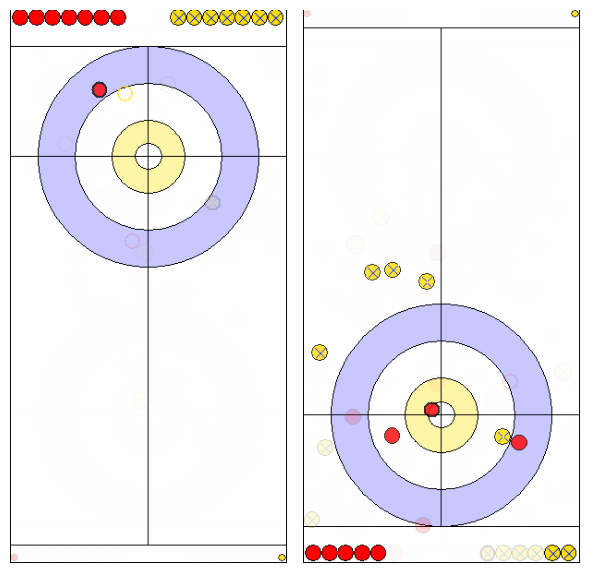

In [103]:
fig, axs = plt.subplots(1,2 ,figsize=(6,6))
ax = axs[0]
for x ,img ,postimage in ql:
    #print(x)
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB),alpha=0.8)
ax.axis("off")
ax = axs[1]
for x ,img ,postimage in ql:
    #print(x)
    ax.imshow(cv2.cvtColor(postimage, cv2.COLOR_BGR2RGB),alpha=0.8)
ax.axis("off")

plt.tight_layout()

In [175]:
i_image = ql[0][2]
def IsHouse(img):
    gray = cv2.cvtColor(i_image, cv2.COLOR_BGR2GRAY)
    circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, dp=1, minDist=10, param1=100, param2=60, minRadius=0, maxRadius=0)
    circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, dp=1, minDist=100, param1=100, param2=60, minRadius=10, maxRadius=0)
    ##[ [ [円の中心点のx座標, 円の中心点のy座標, 円の半径], [円の中心点のx座標, 円の中心点のy座標, 円の半径], … ] ]
    return (len(circles[0])) == 1 

In [176]:
qz1 = list( map( lambda q: IsHouse(q[1]) , ql) )

In [177]:
qz2 = list( map( lambda q: IsHouse(q[2]) , ql) )

In [178]:
all(qz1),all(qz2)

(True, True)

In [152]:
img.shape[0]//2

300

In [231]:
i_image = ql[0][2]
def IsHouse2(i_image):
    gray = cv2.cvtColor(i_image, cv2.COLOR_BGR2GRAY)
    #circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, dp=1, minDist=10, param1=100, param2=60, minRadius=0, maxRadius=0)
    circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, dp=1, minDist=100, param1=100, param2=60, minRadius=60, maxRadius=0)
    ##[ [ [円の中心点のx座標, 円の中心点のy座標, 円の半径], [円の中心点のx座標, 円の中心点のy座標, 円の半径], … ] ]
    isFlip = img.shape[0]//2 < circles[0][0][1]
    ##print(img.shape[0]//2 , circles[0][0][1])
    return  pd.Series([  (len(circles[0])) == 1  , circles[0][0][2]//1 ,isFlip]) 

In [233]:
qd1 = list( map( lambda q: IsHouse2(q[1]) , ql) )
##pd.DataFrame(qd1)

In [234]:
qd2= list( map( lambda q: IsHouse2(q[2]) , ql) )
##pd.DataFrame(qd2)

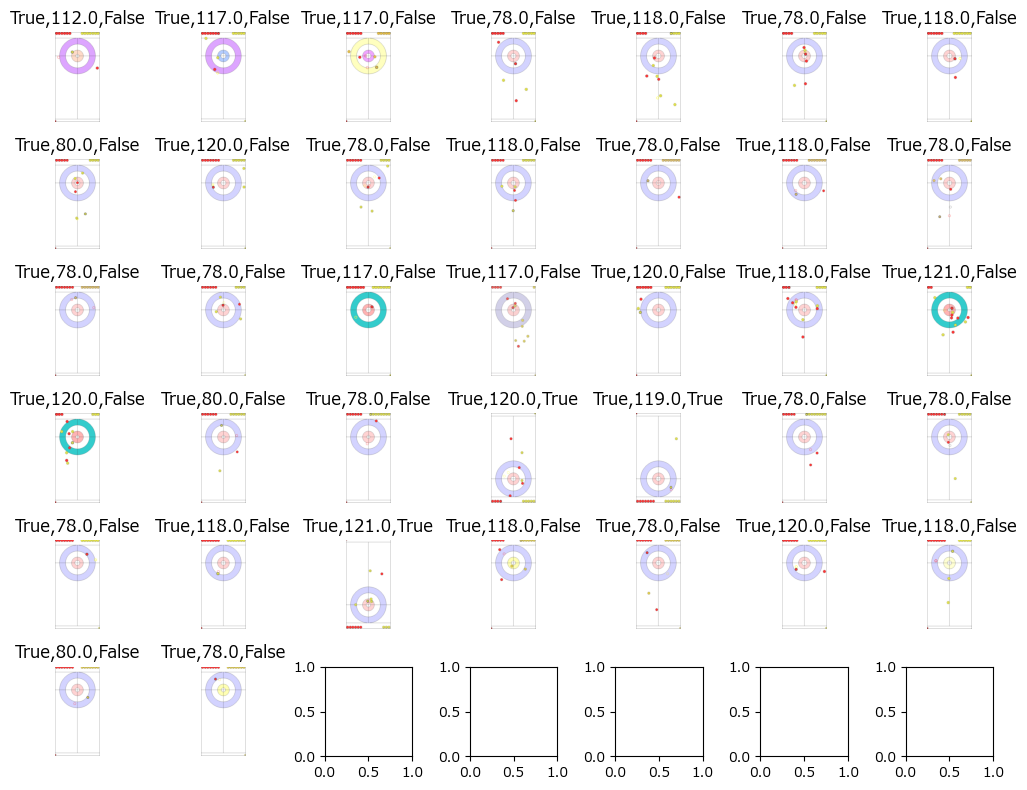

In [247]:
len(ql)
fig, axs = plt.subplots(6,7 ,figsize=(10,8))
axs = axs.flatten()
ax = axs[0]
i = 0
for i , (fn,img1,img2)  in enumerate(ql): 
    q = qd1[i]
    ax = axs[i]
    ax.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB),alpha=0.8)
    ax.set_title(f'{q[0]},{q[1]},{q[2]}')
    ax.axis("off")
    i = i+1

plt.tight_layout()

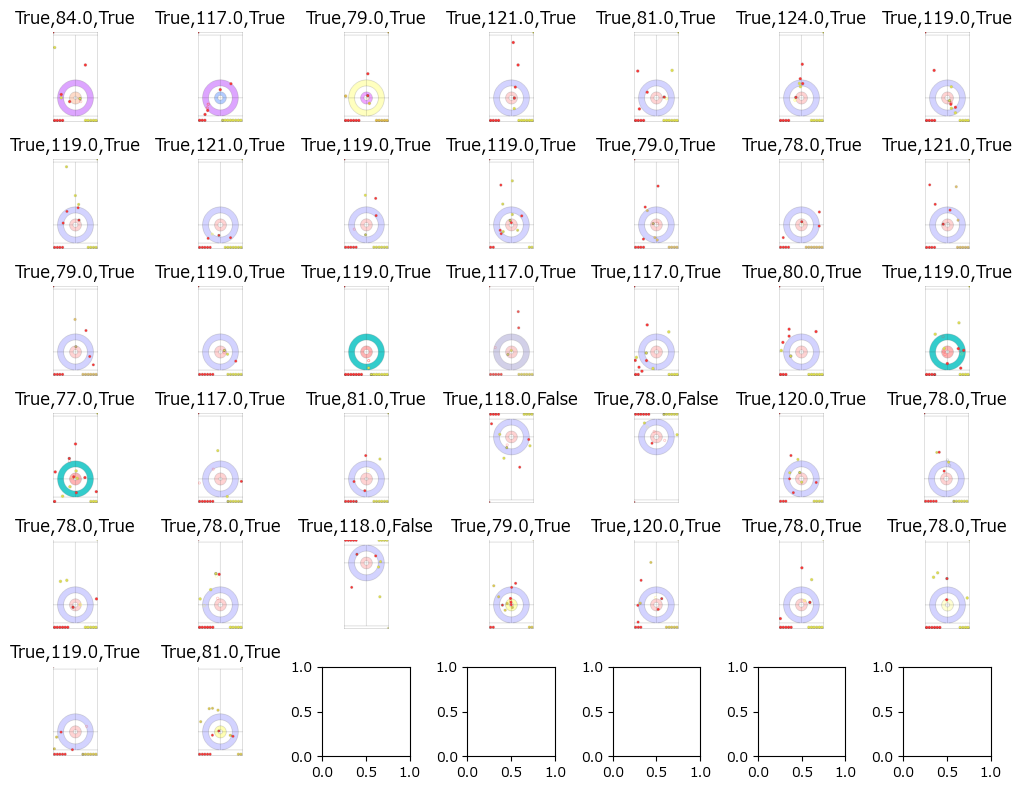

In [248]:
len(ql)
fig, axs = plt.subplots(6,7 ,figsize=(10,8))
axs = axs.flatten()
ax = axs[0]
i = 0
for i , (fn,img1,img2)  in enumerate(ql): 
    q = qd2[i]
    ax = axs[i]
    ax.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB),alpha=0.8)
    ax.set_title(f'{q[0]},{q[1]},{q[2]}')
    ax.axis("off")
    i = i+1

plt.tight_layout()

In [249]:
def IsHouseFlip(i_image):
    gray = cv2.cvtColor(i_image, cv2.COLOR_BGR2GRAY)
    #circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, dp=1, minDist=10, param1=100, param2=60, minRadius=0, maxRadius=0)
    circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, dp=1, minDist=100, param1=100, param2=60, minRadius=60, maxRadius=0)
    ##[ [ [円の中心点のx座標, 円の中心点のy座標, 円の半径], [円の中心点のx座標, 円の中心点のy座標, 円の半径], … ] ]
    isFlip = img.shape[0]//2 < circles[0][0][1]
    ##print(img.shape[0]//2 , circles[0][0][1])
    return  pd.Series([  (len(circles[0])) == 1  , circles[0][0][2]//1 ,isFlip]) 